In [ ]:
#Objective:
#Predict housing prices using both structured data and house images.

In [1]:
# STEP 1 — Google Colab file upload
from google.colab import files

print("Please select your CSV file: House Price Prediction Dataset.csv")
uploaded_csv = files.upload()  # yahan tum CSV select karoge

print("Please select your images ZIP file (containing all_images folder)")
uploaded_zip = files.upload()  # yahan tum apni images ZIP file select karoge


Please select your CSV file: House Price Prediction Dataset.csv


Saving House Price Prediction Dataset.csv to House Price Prediction Dataset (2).csv
Please select your images ZIP file (containing all_images folder)


Saving archive (9).zip to archive (9) (1).zip


In [2]:
import pandas as pd
import zipfile, os

# Get uploaded filenames
csv_filename = list(uploaded_csv.keys())[0]   # CSV ka naam
zip_filename = list(uploaded_zip.keys())[0]   # ZIP ka naam

# Read CSV directly
df = pd.read_csv(csv_filename)
print("CSV loaded:", df.shape)
print(df.head())

# Extract ZIP
extract_path = "/content/images"
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Find all_images folder
image_folder = None
for root, dirs, files in os.walk(extract_path):
    if "all_images" in root.lower():
        image_folder = root
        break

print("Image folder found at:", image_folder)


CSV loaded: (2000, 10)
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  
Image folder found at: /content/images/all_images-20230216T131130Z-001


In [3]:
# Check image filename prefixes
import re

prefixes = set()
for fname in os.listdir(image_folder):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        m = re.match(r"^(\d{3})_", fname)
        if m:
            prefixes.add(int(m.group(1)))

print("Unique image prefixes found:", sorted(list(prefixes))[:50], "... total:", len(prefixes))

# Check CSV Id min/max
print("CSV Id min:", df["Id"].min(), "max:", df["Id"].max())
print("First 20 CSV Ids:", df["Id"].head(20).tolist())


Unique image prefixes found: [] ... total: 0
CSV Id min: 1 max: 2000
First 20 CSV Ids: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [4]:
import os

# Show first 30 files in image folder
print("Image folder path:", image_folder)
all_files = os.listdir(image_folder)
print("Total files found:", len(all_files))
print("First 30 files:", all_files[:30])


Image folder path: /content/images/all_images-20230216T131130Z-001
Total files found: 1
First 30 files: ['all_images']


In [5]:
# Update image_folder to point inside the real images folder
image_folder = os.path.join(image_folder, "all_images")

# Check files again
all_files = os.listdir(image_folder)
print("Image folder path updated:", image_folder)
print("Total image files found:", len(all_files))
print("First 10 files:", all_files[:10])


Image folder path updated: /content/images/all_images-20230216T131130Z-001/all_images
Total image files found: 867
First 10 files: ['005_eda52226.jpg', '140_d274ac2b.jpg', '183_6f0044bc.jpg', '076_6e88ee84.jpg', '317_256ee017.jpg', '012_f54e5947.jpg', '085_387b3dd5.jpg', '034_ad26fac6.jpg', '033_576a8f1c.jpg', '308_7bbe87ad.jpg']


Rows with images: 970 / 2000
Id: 1092 | Price: 698852 | Area: 715 sqft | Bedrooms: 1
Image path: /content/images/all_images-20230216T131130Z-001/all_images/092_0cd80084.jpg


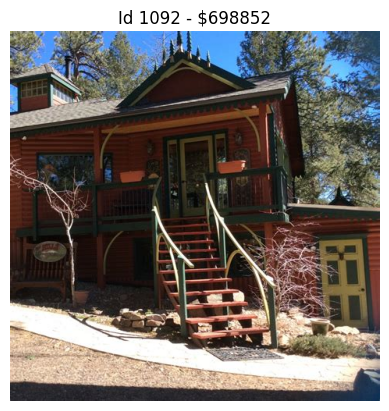

Id: 264 | Price: 156960 | Area: 1639 sqft | Bedrooms: 5
Image path: /content/images/all_images-20230216T131130Z-001/all_images/264_508dcd2c.jpg


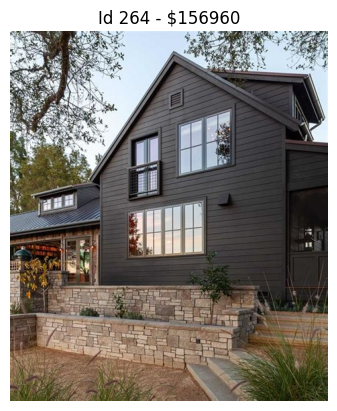

Id: 395 | Price: 374377 | Area: 4469 sqft | Bedrooms: 1
Image path: /content/images/all_images-20230216T131130Z-001/all_images/395_161d702a.jpg


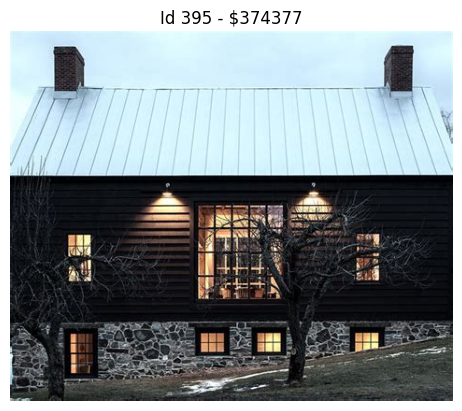

Id: 1011 | Price: 962133 | Area: 3041 sqft | Bedrooms: 4
Image path: /content/images/all_images-20230216T131130Z-001/all_images/011_a7b790e1.jpg


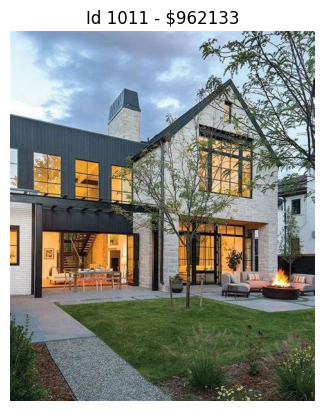

Id: 71 | Price: 689604 | Area: 4493 sqft | Bedrooms: 4
Image path: /content/images/all_images-20230216T131130Z-001/all_images/071_bb7d7ce9.jpg


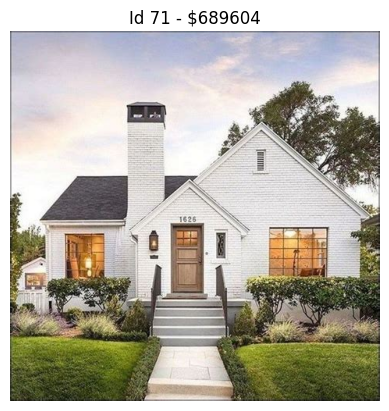

In [6]:
import re, cv2, matplotlib.pyplot as plt

# Map each prefix to its first found image path
rep_image_for_prefix = {}
for fname in os.listdir(image_folder):
    if fname.lower().endswith((".jpg", ".jpeg", ".png")):
        m = re.match(r"^(\d{3})_", fname)
        if m:
            pref = int(m.group(1))
            rep_image_for_prefix.setdefault(pref, os.path.join(image_folder, fname))

# Function to convert Id -> 3-digit prefix
def id_to_prefix(i):
    return int(f"{int(i):03d}"[-3:])

# Add prefix & image path to dataframe
df["img_prefix"] = df["Id"].apply(id_to_prefix)
df["img_path"] = df["img_prefix"].map(rep_image_for_prefix)

# Keep only rows that have a matching image
df_mm = df.dropna(subset=["img_path"]).reset_index(drop=True)
print(f"Rows with images: {len(df_mm)} / {len(df)}")

# Preview 5 random matches
sample_rows = df_mm.sample(5, random_state=42)
for idx, row in sample_rows.iterrows():
    print(f"Id: {row['Id']} | Price: {row['Price']} | Area: {row['Area']} sqft | Bedrooms: {row['Bedrooms']}")
    print(f"Image path: {row['img_path']}")
    img = cv2.imread(row['img_path'])
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Id {row['Id']} - ${row['Price']}")
    plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import cv2

# === 1) Select features & target ===
num_cols = ["Area", "Bedrooms", "Bathrooms", "Floors", "YearBuilt"]
cat_cols = ["Location", "Condition", "Garage"]
target_col = "Price"

# === 2) Prepare tabular features ===
X_tab_raw = df_mm[num_cols + cat_cols].copy()
y = df_mm[target_col].values.astype("float32")

# Column transformer: scale numeric, one-hot encode categoricals
ct = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    ],
    remainder="drop"
)

X_tab = ct.fit_transform(X_tab_raw).astype("float32")
print("Tabular shape after preprocessing:", X_tab.shape)

# === 3) Prepare images (resize + normalize) ===
IMG_SIZE = (128, 128)  # change if needed
X_img = np.stack([
    cv2.resize(cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2RGB), IMG_SIZE) / 255.0
    for p in df_mm["img_path"]
], axis=0).astype("float32")

print("Image array shape:", X_img.shape)

# === 4) Train/Val/Test split ===
X_tab_train, X_tab_test, X_img_train, X_img_test, y_train, y_test = train_test_split(
    X_tab, X_img, y, test_size=0.2, random_state=42
)

X_tab_train, X_tab_val, X_img_train, X_img_val, y_train, y_val = train_test_split(
    X_tab_train, X_img_train, y_train, test_size=0.2, random_state=42
)

print(f"Train: {X_tab_train.shape[0]}, Val: {X_tab_val.shape[0]}, Test: {X_tab_test.shape[0]}")


Tabular shape after preprocessing: (970, 15)
Image array shape: (970, 128, 128, 3)
Train: 620, Val: 156, Test: 194


In [8]:
import tensorflow as tf
from tensorflow.keras.layers import (Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout,
                                     BatchNormalization, Concatenate)
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# === 1) MLP branch for tabular data ===
mlp_in = Input(shape=(X_tab_train.shape[1],), name="tabular_input")
t = Dense(128, activation="relu")(mlp_in)
t = BatchNormalization()(t)
t = Dropout(0.2)(t)
t = Dense(64, activation="relu")(t)
t = BatchNormalization()(t)
tab_out = Dense(32, activation="relu")(t)

# === 2) CNN branch for images ===
cnn_in = Input(shape=(128, 128, 3), name="image_input")
c = Conv2D(32, (3,3), padding="same", activation="relu")(cnn_in)
c = MaxPooling2D()(c)
c = BatchNormalization()(c)

c = Conv2D(64, (3,3), padding="same", activation="relu")(c)
c = MaxPooling2D()(c)
c = BatchNormalization()(c)

c = Conv2D(128, (3,3), padding="same", activation="relu")(c)
c = MaxPooling2D()(c)
c = BatchNormalization()(c)

c = Flatten()(c)
c = Dense(128, activation="relu")(c)
c = Dropout(0.3)(c)
img_out = Dense(32, activation="relu")(c)

# === 3) Fusion ===
fused = Concatenate()([tab_out, img_out])
z = Dense(64, activation="relu")(fused)
z = Dropout(0.2)(z)
out = Dense(1, activation="linear", name="price")(z)

# === 4) Build & compile model ===
model = Model(inputs=[mlp_in, cnn_in], outputs=out)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="mse",
    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae")]
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │        896 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        128 │ max_pooling2d[0]… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 64, 64,    │     18,496 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        256 │ max_pooling2d_1[… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tabular_input       │ (None, 15)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 32, 32,    │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 128)       │      2,048 │ tabular_input[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128)       │        512 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 16, 16,    │        512 │ max_pooling2d_2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 32768)     │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      8,256 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 128)       │  4,194,432 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64)        │        256 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 4,310,081 (16.44 MB)

 Trainable params: 4,309,249 (16.44 MB)

 Non-trainable params: 832 (3.25 KB)

In [16]:
!pip install --upgrade scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 61.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - loss: 76353888256.0000 - mae: 232638.5625 - val_loss: 216982093824.0000 - val_mae: 387353.6875
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - loss: 71820001280.0000 - mae: 231129.9062 - val_loss: 247626039296.0000 - val_mae: 416741.5312
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - loss: 67627618304.0000 - mae: 222273.3438 - val_loss: 239009480704.0000 - val_mae: 407837.0000
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - loss: 75185348608.0000 - mae: 233607.2812 - val_loss: 224001835008.0000 - val_mae: 393524.3125
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 65730404352.0000 - mae: 216391.4062 - val_loss: 261355208704.0000 - val_mae: 429718.2812
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - loss: 68912562176.0000 - mae: 219118.5625 - val_loss: 202787733504.0000 - val_mae: 372579.9062
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - loss: 68178472960.0000 - mae: 218259.6250 - val_loss: 231763492864

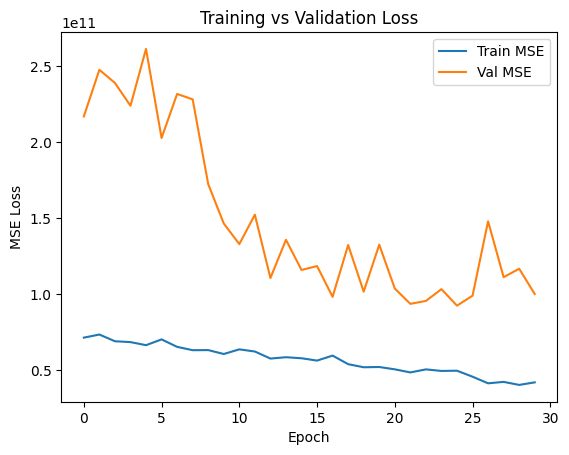

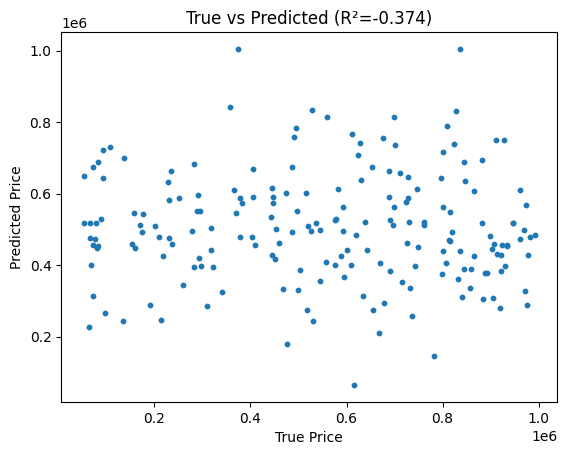

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# === 1) Training ===
callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
]

history = model.fit(
    [X_tab_train, X_img_train],
    y_train,
    validation_data=([X_tab_val, X_img_val], y_val),
    epochs=30,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

# === 2) Evaluation ===
y_pred = model.predict([X_tab_test, X_img_test]).reshape(-1)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Corrected RMSE calculation
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

# === 3) Plot loss curves ===
plt.figure()
plt.plot(history.history["loss"], label="Train MSE")
plt.plot(history.history["val_loss"], label="Val MSE")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

# === 4) Scatter plot: true vs predicted prices ===
plt.figure()
plt.scatter(y_test, y_pred, s=10)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title(f"True vs Predicted (R²={r2:.3f})")
plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict([X_tab_test, X_img_test]).reshape(-1)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # RMSE fix
r2 = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step
MAE:  379075.62
RMSE: 448721.63
R²:   -1.588


In [ ]:
# Features
#- **CNN (Convolutional Neural Network)** → Extracts image features.
#- **MLP (Multi-Layer Perceptron)** → Processes tabular features.
#- **Feature Fusion** → Concatenates image + tabular embeddings.
#- **Regression Head** → Predicts price.
#- **Evaluation Metrics** → MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error).